# <center>AI SATURDAYS DONOSTIA 2020<center>
    
## <center>Regresión Indicador "DeprRate" (Índice de Depresión) - Cluster 1</center>
    
## <center>Proyecto Práctico Equipo FACEMOOD</center>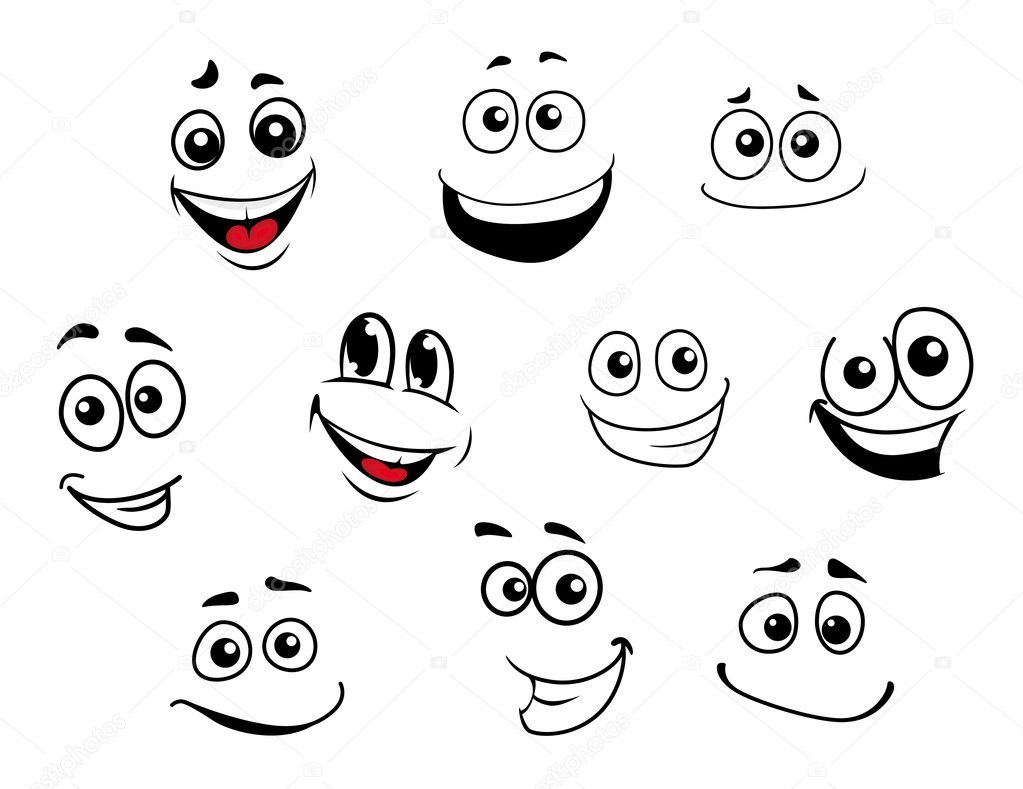    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regresion_functions import *
%load_ext autoreload
%autoreload 2

### Conjunto de Datos con 3 Clusters

In [2]:
df = pd.read_csv('../processed-data/cluster3_socialmedia_data.csv', index_col=0)
df.head()

,PSMU,News,ASMU,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,Sintomas_Cluster3
Participant,,,,,,,,,,,,
115091,32.883117,15.012987,16.792208,45.155844,20.454545,23.285714,37.272727,47.675325,17.831169,21.389610,37.441558,1
131183,45.203390,11.593220,28.254237,36.288136,3.474576,0.389831,19.508475,14.508475,0.254237,0.406780,16.898305,0
438907,44.595745,34.645833,27.040816,51.040816,26.285714,21.833333,35.729167,50.979592,23.395833,14.591837,25.000000,1
515070,25.711538,38.576923,37.826923,34.865385,12.692308,14.076923,32.903846,16.038462,11.403846,10.500000,17.365385,0
572172,36.852273,45.250000,40.545455,18.272727,10.738636,9.375000,14.352273,25.761364,38.056818,17.431818,20.511364,0


### Creación Índice de Depresión

In [3]:
df["DeprRate"]=(df["LowMood"]+df["LossOfInt"]+df["Hopeless"])/3
df.head()

,PSMU,News,ASMU,Fatigue,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,Sintomas_Cluster3,DeprRate
Participant,,,,,,,,,,,,,
115091,32.883117,15.012987,16.792208,45.155844,20.454545,23.285714,37.272727,47.675325,17.831169,21.389610,37.441558,1,29.839827
131183,45.203390,11.593220,28.254237,36.288136,3.474576,0.389831,19.508475,14.508475,0.254237,0.406780,16.898305,0,6.129944
438907,44.595745,34.645833,27.040816,51.040816,26.285714,21.833333,35.729167,50.979592,23.395833,14.591837,25.000000,1,30.619048
515070,25.711538,38.576923,37.826923,34.865385,12.692308,14.076923,32.903846,16.038462,11.403846,10.500000,17.365385,0,13.076923
572172,36.852273,45.250000,40.545455,18.272727,10.738636,9.375000,14.352273,25.761364,38.056818,17.431818,20.511364,0,17.977273


### Nuevo Conjunto de Datos

In [4]:
df2 = df[["ASMU", "News", "PSMU", "Stress", "Inferior", "Concentrat", "Loneliness", "Fatigue", "DeprRate", "Sintomas_Cluster3"]]
print(df2.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(df2.shape))

                  ASMU       News       PSMU     Stress   Inferior  \
Participant                                                          
115091       16.792208  15.012987  32.883117  37.441558  17.831169   
131183       28.254237  11.593220  45.203390  16.898305   0.254237   
438907       27.040816  34.645833  44.595745  25.000000  23.395833   
515070       37.826923  38.576923  25.711538  17.365385  11.403846   
572172       40.545455  45.250000  36.852273  20.511364  38.056818   

             Concentrat  Loneliness    Fatigue   DeprRate  Sintomas_Cluster3  
Participant                                                                   
115091        37.272727   23.285714  45.155844  29.839827                  1  
131183        19.508475    0.389831  36.288136   6.129944                  0  
438907        35.729167   21.833333  51.040816  30.619048                  1  
515070        32.903846   14.076923  34.865385  13.076923                  0  
572172        14.352273    9.375000

### Datos Cluster 1

In [5]:
df3=df2[df2["Sintomas_Cluster3"]==1]
df3= df3[["ASMU", "News", "PSMU", "Stress", "Inferior", "Concentrat", "Loneliness", "Fatigue", "DeprRate"]]
print(df3.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(df3.shape))

                  ASMU       News       PSMU     Stress   Inferior  \
Participant                                                          
115091       16.792208  15.012987  32.883117  37.441558  17.831169   
438907       27.040816  34.645833  44.595745  25.000000  23.395833   
680605        1.463158  14.631579  34.547368  40.063158   3.000000   
1500743      25.939759  16.566265  32.590361  32.554217  14.855422   
1875048      21.738462   5.843750  24.953125  33.468750  13.765625   

             Concentrat  Loneliness    Fatigue   DeprRate  
Participant                                                
115091        37.272727   23.285714  45.155844  29.839827  
438907        35.729167   21.833333  51.040816  30.619048  
680605        46.852632    3.663158  60.894737  19.715789  
1500743       45.072289    9.228916  40.156627  23.871486  
1875048       33.203125   24.312500  45.859375  29.424840  
No. Filas/Columnas del Conjunto de Datos: (44, 9)


### Estadísticas descriptivas de las medias por participante del Cluster 1

In [6]:
df3.describe()

,ASMU,News,PSMU,Stress,Inferior,Concentrat,Loneliness,Fatigue,DeprRate
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,25.449406,24.046184,33.850722,35.817086,19.231795,40.236774,22.846137,50.521560,28.404460
std,14.314653,13.404588,12.804289,9.783799,10.700234,10.384211,9.969584,12.466464,7.177234
min,1.039216,0.308642,11.229167,16.755814,0.019608,25.296296,3.663158,26.907407,15.672565
25%,16.576299,13.856618,26.915616,30.492831,13.275786,32.507143,17.595238,41.682495,23.864855
50%,24.991765,24.202008,32.467908,34.390741,19.319166,39.516372,22.504956,49.808840,27.002572
75%,30.740316,33.532536,40.712885,40.341019,23.678504,46.035033,27.260168,57.380229,30.555556
max,58.786885,49.215686,75.413043,61.482353,52.658824,70.562500,53.788235,78.378947,51.952941


### Diagrama de Matriz para las Medias de las 9 Variables

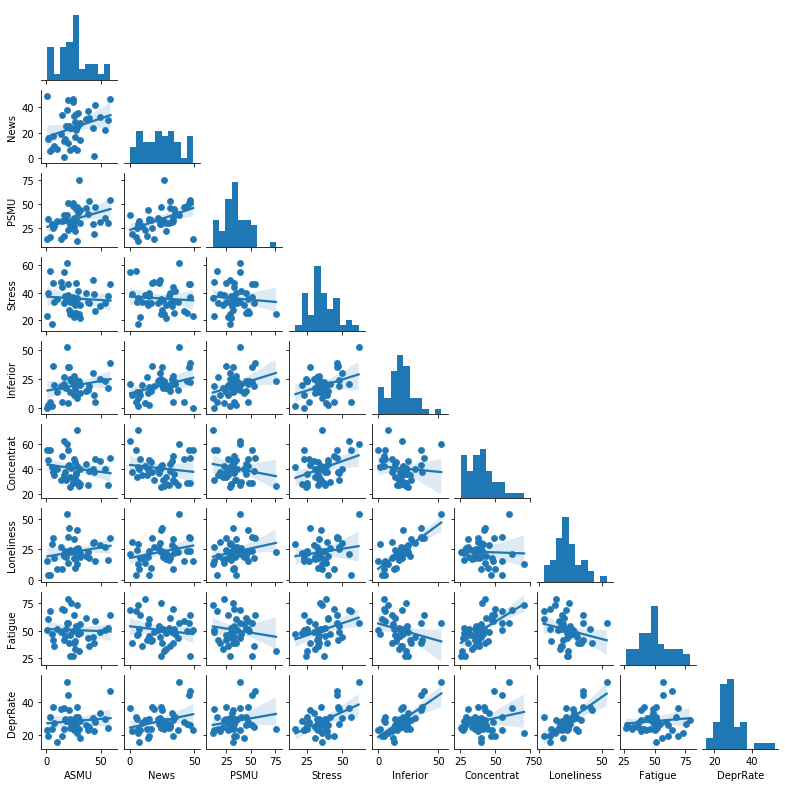

In [7]:
printMatrixDiagram(df3)   # Función definida en "regresion_functions"

### Correlaciones de Pearson para las Medias de las 9 Variables

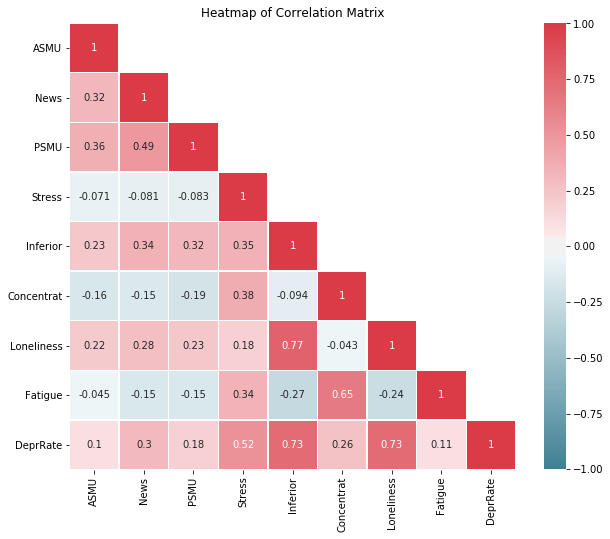

In [8]:
printPearsonCorrelations(df3)   # Función definida en "regresion_functions"

### Se observan correlaciones más significativas entre las siguientes variables:

DeprRate vs Loneliness

DeprRate vs Inferior

Loneliness vs Inferior


No se observa "multicolinealidad"

### Regresión Lineal para las Medias: y = DeprRate, X = Demás Variables

In [9]:
label = df3.DeprRate

df3.drop('DeprRate', axis=1, inplace=True)

### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [10]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})

data_list_medias = calculateRegression(df3, label, resultsummary, alpha=0.15)   # Función definida en "regresion_functions"

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0      2.680          3.461         3.232        0.803      -0.225   
1        1.0      2.228          3.468         3.121        0.802      -0.143   
2        2.0      2.573          3.473         3.320        0.802      -0.293   
3        3.0      1.842          3.510         3.229        0.798      -0.223   

   p_value_max removed_var  
0        0.911        PSMU  
1        0.633     Fatigue  
2        0.539        ASMU  
3        0.115           -  

Modelo Final
['News', 'Stress', 'Inferior', 'Concentrat', 'Loneliness']
[0.07565841 0.18577859 0.19752373 0.16053377 0.33411428] 1.8420832771152895
RMSE of Linear Regression Model with Training Data: 3.51
RMSE of Linear Regression Model with Testing Data: 3.23
R2 Coefficient for Linear Regression Model with Training Data: 0.798
R2 Coefficient for Linear Regression Model with Testing Data: -0.223


### Análisis de Residuos Modelo Final

Estadística prueba normalidad Kolmogorov-Smirnov=0.107, pvalue=0.815

Probablemente Normal


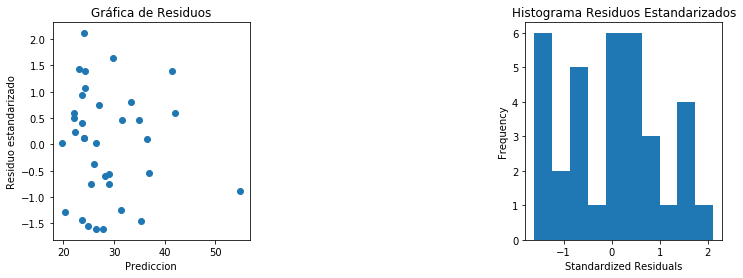

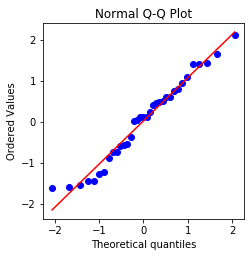

In [11]:
fitt = data_list_medias[5]
standardized_residuals = data_list_medias[4]

residualAnalysis(fitt, standardized_residuals)   # Función definida en "regresion_functions"

## Conclusión Final Modelo Ajustado (Cluster 1; y = DeprRate)
#####    
### El coeficiente de determinación (R2) del modelo ajustado para las "medias" del Cluster 1 es alto (79,8%).
### El Análisis de Residuos ha sido considerado satisfactorio, teniendo en cuenta la escasez de datos.
### En principio, se valida el modelo bajo un punto de vista estadístico.
#### Nota: Debido a la escasez de los datos reservados para el testeo (total de 9 participantes), no tendremos en cuenta el "R2 Testing Data".
#####    
### DeprRate = 1,84 + 0,33 Loneliness + 0,20 Inferior + 0,19 Stress + 0,16 Concentrat  + 0,08 News